In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font',family='NanumBarunGothic')

In [ ]:
!pip install konlpy

In [ ]:
!pip install koreanize-matplotlib

In [ ]:
import pandas as pd
import koreanize_matplotlib

In [ ]:
df = pd.read_csv('appreply.csv')
reply_df = df.iloc[3:]['text']
reply_df

3       배달의민족 주문시 리뷰를 자주 참고하는 편입니다. 한가지 건의사항이 있다면 최신순,...
4       내가 주문했던 과거목록에서도 검색기능이 있었으면 좋겠어요.. 분명 이 가게에 시킨 ...
5       검색 화면에서 전체/배달/포장 탭 중 배달 탭을 스크롤 내리면서 볼 때, 아래로 스...
6       배달팁 낮은 순으로 정렬하면 0~4000원 이런식으로 된 가게가 가장 위로 올라옵니...
7       최근 업데이트가 안드로이드5사양 정도에서는 안되는것 같습니다.. 배민 어플 실행시 ...
                              ...                        
998     갑자기 로그아웃 되더니 비밀번호 변경 실패 메세지가 계속 뜨네요. 휴대폰 번호로 인...
999     기사님이 상품 픽업을 하셨는지 표시되면 더 좋을 것 같습니다. 가게에서 조리가 늦게...
1000    요즘 요기요 보다 배민을 많이 쓰는 사람입니다 전화보다 앱을 써서 좀더 간편하고 다...
1001    취소 됐으면 적어도 전화 주는 제도는 있어야하는거 아닌가요? 주문해놓고 다른거 하는...
1002    배달의 민족 참 잘 사용하고 있어요. 별 다섯 개를 드리고 싶지만 한 가지 아쉬운 ...
Name: text, Length: 1000, dtype: object

In [ ]:
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()

reply_list = []
for temp in tqdm(reply_df):
    words = okt.nouns(temp)
    w_list = []
    for word in words:
        if len(word) > 1:
            w_list.append(word)

    reply_list.append(w_list)

reply_list

100%|██████████| 1000/1000 [00:09<00:00, 108.35it/s]


[['배달',
  '민족',
  '주문',
  '리뷰',
  '자주',
  '참고',
  '편입',
  '한가지',
  '건의',
  '사항',
  '최신',
  '점순',
  '주문',
  '자하',
  '메뉴',
  '메뉴',
  '리뷰',
  '확인',
  '기능',
  '메뉴',
  '검색',
  '기능',
  '리뷰',
  '특정',
  '메뉴',
  '검색',
  '기능',
  '주문',
  '수가',
  '메뉴',
  '리뷰',
  '보기',
  '위해',
  '래그',
  '시간',
  '소요',
  '효율',
  '발생',
  '긍정',
  '검토',
  '주심'],
 ['주문',
  '과거',
  '목록',
  '검색',
  '기능',
  '분명',
  '가게',
  '기억',
  '찾기',
  '메뉴',
  '검색',
  '곱창',
  '치면',
  '과거',
  '곱창',
  '목록',
  '가게',
  '리뷰',
  '리뷰',
  '보기'],
 ['검색',
  '화면',
  '전체',
  '배달',
  '포장',
  '배달',
  '크롤',
  '아래',
  '크롤',
  '자꾸만',
  '왼쪽',
  '오른쪽',
  '전체',
  '포장',
  '정말',
  '검색',
  '배달',
  '포장',
  '마트',
  '하나',
  '선택',
  '좌우',
  '가끔',
  '크롤',
  '왼쪽',
  '전체',
  '가게'],
 ['배달',
  '정렬',
  '가게',
  '가장',
  '위로',
  '지역',
  '추가',
  '배달',
  '별도',
  '체크',
  '배달',
  '이상',
  '배달',
  '장난',
  '하나',
  '하나',
  '가격',
  '대별',
  '금액',
  '체크',
  '배달',
  '별도',
  '확인'],
 ['최근',
  '업데이트',
  '안드로이드',
  '사양',
  '정도',
  '배민',
  '어플',
  '실행',
  '업데이트',
  '하라',
  '업데이트',
  '업데이트'

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori
result = list(apriori(reply_list,min_support=0.05))
result

[RelationRecord(items=frozenset({'가게'}), support=0.208, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'가게'}), confidence=0.208, lift=1.0)]),
 RelationRecord(items=frozenset({'개선'}), support=0.102, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'개선'}), confidence=0.102, lift=1.0)]),
 RelationRecord(items=frozenset({'검색'}), support=0.111, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'검색'}), confidence=0.111, lift=1.0)]),
 RelationRecord(items=frozenset({'결제'}), support=0.115, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'결제'}), confidence=0.115, lift=1.0)]),
 RelationRecord(items=frozenset({'경우'}), support=0.076, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'경우'}), confidence=0.076, lift=1.0)]),
 RelationRecord(items=frozenset({'계속'}), support=0.095, ordered_statistics=[OrderedStatistic(items_base=frozenset()

In [ ]:
df = pd.DataFrame(result)
df

,items,support,ordered_statistics
0,(가게),0.208,"[((), (가게), 0.208, 1.0)]"
1,(개선),0.102,"[((), (개선), 0.102, 1.0)]"
2,(검색),0.111,"[((), (검색), 0.111, 1.0)]"
3,(결제),0.115,"[((), (결제), 0.115, 1.0)]"
4,(경우),0.076,"[((), (경우), 0.076, 1.0)]"
...,...,...,...
82,"(주문, 어플)",0.050,"[((), (주문, 어플), 0.05, 1.0), ((어플), (주문), 0.333..."
83,"(주문, 음식)",0.057,"[((), (주문, 음식), 0.057, 1.0), ((음식), (주문), 0.41..."
84,"(전화, 주문)",0.061,"[((), (전화, 주문), 0.061, 1.0), ((전화), (주문), 0.68..."
85,"(취소, 주문)",0.052,"[((), (취소, 주문), 0.052, 1.0), ((주문), (취소), 0.16..."


In [ ]:
item_len = []

for temp in df['items']:
    item_len.append(len(temp))

df['length'] = item_len

In [ ]:
df = df[(df['length']==2) & (df['support']>0.05)]
df

,items,support,ordered_statistics,length
49,"(가게, 기능)",0.061,"[((), (가게, 기능), 0.061, 1.0), ((가게), (기능), 0.29...",2
50,"(가게, 리뷰)",0.054,"[((), (가게, 리뷰), 0.054, 1.0), ((가게), (리뷰), 0.25...",2
51,"(가게, 메뉴)",0.063,"[((), (가게, 메뉴), 0.063, 1.0), ((가게), (메뉴), 0.30...",2
52,"(가게, 배달)",0.109,"[((), (가게, 배달), 0.109, 1.0), ((가게), (배달), 0.52...",2
53,"(가게, 배민)",0.051,"[((), (가게, 배민), 0.051, 1.0), ((가게), (배민), 0.24...",2
54,"(가게, 주문)",0.086,"[((), (가게, 주문), 0.086, 1.0), ((가게), (주문), 0.41...",2
55,"(결제, 주문)",0.052,"[((), (결제, 주문), 0.052, 1.0), ((결제), (주문), 0.45...",2
57,"(리뷰, 기능)",0.056,"[((), (리뷰, 기능), 0.056, 1.0), ((기능), (리뷰), 0.33...",2
58,"(메뉴, 기능)",0.057,"[((), (메뉴, 기능), 0.057, 1.0), ((기능), (메뉴), 0.34...",2
59,"(배달, 기능)",0.074,"[((), (기능, 배달), 0.074, 1.0), ((기능), (배달), 0.44...",2


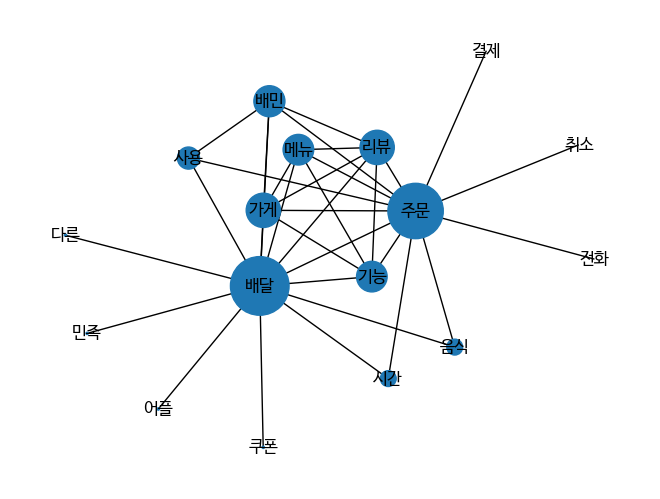

In [ ]:
import networkx as nx
import numpy as np
plt.rc('font',family='NanumBarunGothic')

G = nx.Graph()
ar = (df['items'])
G.add_edges_from(ar)

pr = nx.pagerank(G)
nsize = np.array([temp for temp in pr.values()])
nsize = 2000 * (nsize-min(nsize))/max(nsize) - min(nsize)

pos = nx.kamada_kawai_layout(G)

nx.draw(G,pos, node_size = nsize, with_labels=True,font_family='NanumBarunGothic')
plt.show()

In [ ]:
G.nodes

NodeView(('가게', '기능', '리뷰', '메뉴', '배달', '배민', '주문', '결제', '다른', '민족', '사용', '시간', '어플', '음식', '쿠폰', '전화', '취소'))